In [ ]:
#Question: Download dataset - DecisionTree, NaiveBayes, Logistic Regression - Train/Test ratio 60/40

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


In [ ]:
X = df[['pregnancies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetespedigreefunction','age']]
y = df[['outcome']]

In [ ]:
X.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

,outcome
0,True
1,False
2,True
3,False
4,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
logistic_pred = logistic_model.predict(X_test)
print(classification_report(y_test, logistic_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

       False       0.83      0.83      0.83       206
        True       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

       False       0.82      0.75      0.79       206
        True       0.57      0.68      0.62       102

    accuracy                           0.73       308
   macro avg       0.70      0.71      0.70       308
weighted avg       0.74      0.73      0.73       308



In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

       False       0.83      0.81      0.82       206
        True       0.63      0.67      0.65       102

    accuracy                           0.76       308
   macro avg       0.73      0.74      0.73       308
weighted avg       0.76      0.76      0.76       308



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


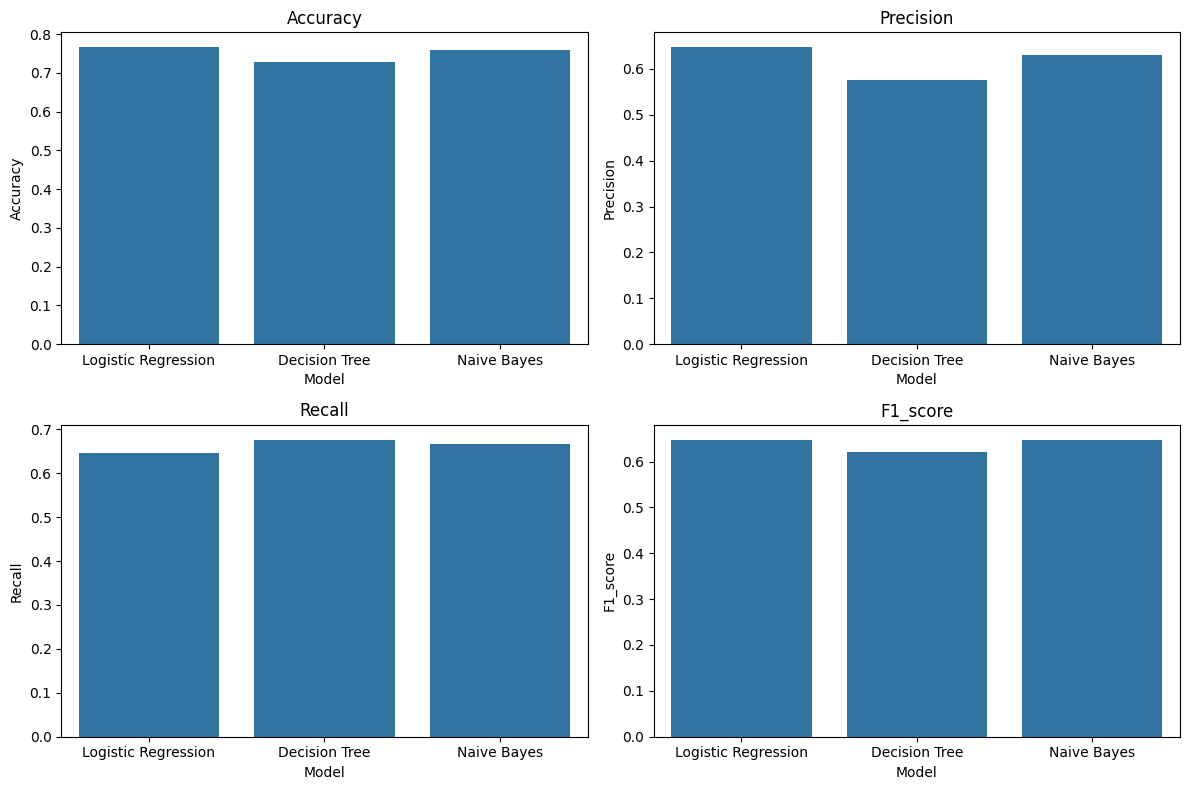

In [ ]:
models = {
    'Logistic Regression': logistic_model,
    'Decision Tree': dt_model,
    'Naive Bayes': nb_model
}

results = {}
for model_name, model in models.items():
  y_pred = model.predict(X_test)
  results[model_name] = {
      'accuracy': accuracy_score(y_test, y_pred),
      'precision': precision_score(y_test, y_pred),
      'recall': recall_score(y_test, y_pred),
      'f1_score': f1_score(y_test, y_pred)
  }

metrics = ['accuracy', 'precision', 'recall', 'f1_score']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, metric in enumerate(metrics):
  values = [results[model][metric] for model in models]
  sns.barplot(x=list(models.keys()), y=values, ax=axes[i])
  axes[i].set_title(metric.capitalize())
  axes[i].set_ylabel(metric.capitalize())
  axes[i].set_xlabel("Model")

plt.tight_layout()
plt.show()